In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

# Load the data set

In [2]:
df=pd.read_csv("delivery_time.csv")

In [3]:
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# EDA And Data Visualization

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [5]:
import matplotlib.pyplot as plt

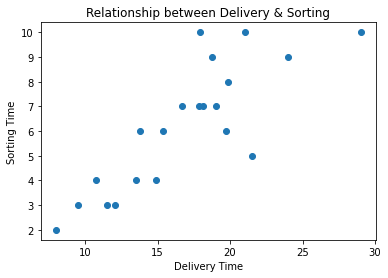

In [6]:
plt.scatter(df["Delivery Time"],df["Sorting Time"])
plt.title("Relationship between Delivery & Sorting")
plt.xlabel("Delivery Time")
plt.ylabel("Sorting Time")
plt.show()

# Feature 

In [7]:

# Renaming Columns
df=df.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
df

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# Correlation Analysis

In [8]:
df.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


In [9]:
# Linear Regression with Sciket-learn libraries 

In [10]:
X=df ["delivery_time"]
Y=df["sorting_time"]

In [11]:
X

0     21.00
1     13.50
2     19.75
3     24.00
4     29.00
5     15.35
6     19.00
7      9.50
8     17.90
9     18.75
10    19.83
11    10.75
12    16.68
13    11.50
14    12.03
15    14.88
16    13.75
17    18.11
18     8.00
19    17.83
20    21.50
Name: delivery_time, dtype: float64

In [12]:
Y

0     10
1      4
2      6
3      9
4     10
5      6
6      7
7      3
8     10
9      9
10     8
11     4
12     7
13     3
14     3
15     4
16     6
17     7
18     2
19     7
20     5
Name: sorting_time, dtype: int64

# Model building

In [13]:
import statsmodels.formula .api as smf

In [14]:
model=smf.ols("delivery_time~sorting_time",data=df).fit()

# Model Testing

In [15]:
# Finding Coefficient parameters
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [16]:
# Finding tvalues and pvalues
model.tvalues , model.pvalues

(Intercept       3.823349
 sorting_time    6.387447
 dtype: float64,
 Intercept       0.001147
 sorting_time    0.000004
 dtype: float64)

In [17]:

# Finding Rsquared Values
model.rsquared , model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

In [18]:
# or finding the r-square value

In [19]:
from sklearn.metrics import mean_squared_error

In [20]:
x_pred = model.predict(Y)

In [21]:
mean_squared_error(X,x_pred)

7.793311548584063

In [22]:
from sklearn.metrics import r2_score
r2_score(X,x_pred)

0.6822714748417231

In [23]:
df

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# Model prediction

In [24]:
# Manual prediction for say sorting time 5
delivery_time = (6.582734) + (1.649020)*(5)
delivery_time

14.827834

In [25]:
# Automatic Prediction for say sorting time 5, 8
new_df=pd.Series([5,8])
new_df

0    5
1    8
dtype: int64

In [26]:

df_pred=pd.DataFrame(new_df,columns=['sorting_time'])
df_pred

,sorting_time
0,5
1,8


In [27]:
model.predict(df_pred)

0    14.827833
1    19.774893
dtype: float64

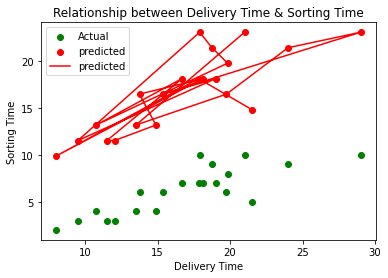

In [28]:
plt.scatter(df["delivery_time"],df["sorting_time"],color='green',label="Actual")
plt.scatter(df["delivery_time"],x_pred,color='red',label="predicted")
plt.plot(df["delivery_time"],x_pred,color='red',label="predicted")

plt.title("Relationship between Delivery Time & Sorting Time")
plt.xlabel("Delivery Time")
plt.legend()
plt.ylabel("Sorting Time")
plt.show()